In [1]:
import project_path
from stats.tools import *
plt.rcParams["figure.figsize"] = (30,15)

### Question 4

#### a

In [2]:
# Loading and Preprocessing the Data 
gm = pd.read_stata('gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')
gm[['logGDPpercap_within','lifeExp_within']] = (gm.groupby('continent')[['logGDPpercap','lifeexp']].transform(lambda x: x - x.mean()))

# Analyzing the Within Variation 
summary = sm.ols(formula = 'lifeExp_within ~ logGDPpercap_within', data = gm).fit().summary()
#export_results_to_csv(summary, 'q4a')
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.137e-06,0.170,-6.68e-06,1.000,-0.334,0.334
logGDPpercap_within,6.4220,0.183,35.044,0.000,6.063,6.781


#### b

In [3]:
# Loading and Preprocessing Data 
gm = pd.read_stata('gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')

# Running Regression with Continent and Year Fixed Effects
summary = sm.ols(formula = 'lifeexp ~ logGDPpercap + continent + year', data = gm).fit().summary()
#export_results_to_csv(summary, 'q4b', directory='/Assignment_4_Exports/')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1119.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:24:01   Log-Likelihood:                -5413.6
No. Observations:                1704   AIC:                         1.084e+04
Df Residuals:                    1697   BIC:                         1.088e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -465.8696     16.674    -27.939      0.000    -498.574    -433.165
continent[T.Americas]     8.9259      0.463     19.280      0.000       8.018       9.834
continent[T.Asia]         7.0629      0.396     17.840      0.000       6.286       7.839
continent[T.Europe]      12.5078      0.510     24.541      0.000      11.508      13.507
continent[T.Oceania]     12.7507      1.275     10.002      0.000      10.250      15.251
logGDPpercap              5.0238      0.159     31.503      0.000       4.711       5.337
year                      0.2416      0.009     28.142      0.000       0.225       0.258
==============================================================================
Omnibus:                       66.798   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.847
Skew:                          -0.433   Prob(JB):                     2.78e-18
Kurtosis:                       3.623   Cond. No.                     2.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### c

##### We were grouping by continent only, and ignoring the year fixed effects

In [4]:
# Loading and Preprocessing the Data 
gm = pd.read_stata('gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')

# below, tweaking the groupby function to include continent and year, so our within effect is now within a continent AND year.
gm[['logGDPpercap_within', 'lifeExp_within']] = gm.groupby(['continent', 'year'])[['logGDPpercap', 'lifeexp']].transform(lambda row: row - row.mean())

# Analyzing the Within Variation 
summary = sm.ols(formula = 'lifeExp_within ~ logGDPpercap_within', data = gm).fit().summary()
#export_results_to_csv(summary, 'q4c')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeExp_within   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1069.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.26e-182
Time:                        10:24:01   Log-Likelihood:                -5336.7
No. Observations:                1704   AIC:                         1.068e+04
Df Residuals:                    1702   BIC:                         1.069e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8.333e-07      0.134   -6.2e-06      1.000      -0.264       0.264
logGDPpercap_within     5.0529      0.155     32.696      0.000       4.750       5.356
==============================================================================
Omnibus:                       60.180   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.402
Skew:                          -0.289   Prob(JB):                     5.80e-23
Kurtosis:                       4.052   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Verifying this by running the regression from part b without controlling for year

In [5]:
# Loading and Preprocessing Data 
gm = pd.read_stata('gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')

# Running Regression with Continent and Year Fixed Effects 
summary = sm.ols(formula = 'lifeexp ~ logGDPpercap + continent ', data = gm).fit().summary()
#export_results_to_csv(summary, 'q4b')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     807.6
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:24:01   Log-Likelihood:                -5740.0
No. Observations:                1704   AIC:                         1.149e+04
Df Residuals:                    1698   BIC:                         1.152e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.3170      1.359      1.704      0.088      -0.349       4.983
continent[T.Americas]     7.0147      0.554     12.652      0.000       5.927       8.102
continent[T.Asia]         5.9117      0.477     12.400      0.000       4.977       6.847
continent[T.Europe]       9.5771      0.604     15.855      0.000       8.392      10.762
continent[T.Oceania]      9.2135      1.536      5.999      0.000       6.201      12.226
logGDPpercap              6.4220      0.183     35.003      0.000       6.062       6.782
==============================================================================
Omnibus:                       80.310   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.400
Skew:                          -0.488   Prob(JB):                     4.29e-22
Kurtosis:                       3.659   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### ~voila~

### Question 8

#### a

In [6]:
# setting up dataframe
od = pd.read_stata('organ_donations.dta')

# Recoding the quarters to numerical
recode = {'Q42010': 1,
          'Q12011': 2,
          'Q22011': 3,
          'Q32011': 4,
          'Q42011': 5,
          'Q12012': 6
          }
od.quarter = od.quarter.apply(lambda row: recode[row])

# creating the treated variable
od['treated'] = 1*((od.state == 'California') & (od.quarter > 3))

# specifiying and running the regression
summary = sm.ols(formula = 'rate ~ treated + state + quarter_num', data = od).fit(method='qr', cov_kwds='cluster').summary()
#export_results_to_csv(summary, 'q8a')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           9.77e-94
Time:                        10:24:01   Log-Likelihood:                 388.57
No. Observations:                 162   AIC:                            -711.1
Df Residuals:                     129   BIC:                            -609.2
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7655      0.011     69.880      0.000       0.744       0.787
state[T.Arizona]                 -0.5329      0.014    -37.466      0.000      -0.561      -0.505
state[T.California]              -0.4950      0.018    -28.239      0.000      -0.530      -0.460
state[T.Colorado]                -0.1055      0.014     -7.417      0.000      -0.134      -0.077
state[T.Connecticut]             -0.3802      0.014    -26.731      0.000      -0.408      -0.352
state[T.District of Columbia]    -0.4300      0.014    -30.237      0.000      -0.458      -0.402
state[T.Florida]                 -0.3769      0.014    -26.504      0.000      -0.405      -0.349
state[T.Hawaii]                  -0.3524      0.014    -24.779      0.000      -0.381      -0.324
state[T.Louisiana]               -0.2167      0.014    -15.239      0.000      -0.245      -0.189
state[T.Maryland]                -0.3076      0.014    -21.629      0.000      -0.336      -0.279
state[T.Michigan]                -0.5409      0.014    -38.029      0.000      -0.569      -0.513
state[T.Minnesota]               -0.2457      0.014    -17.277      0.000      -0.274      -0.218
state[T.Missouri]                -0.3660      0.014    -25.733      0.000      -0.394      -0.338
state[T.Montana]                 -0.1184      0.014     -8.328      0.000      -0.147      -0.090
state[T.Nebraska]                -0.3308      0.014    -23.260      0.000      -0.359      -0.303
state[T.New Hampshire]           -0.2292      0.014    -16.115      0.000      -0.257      -0.201
state[T.New Jersey]              -0.4607      0.014    -32.396      0.000      -0.489      -0.433
state[T.New York]                -0.6435      0.014    -45.249      0.000      -0.672      -0.615
state[T.North Carolina]          -0.2483      0.014    -17.462      0.000      -0.276      -0.220
state[T.Ohio]                    -0.2077      0.014    -14.606      0.000      -0.236      -0.180
state[T.Pennsylvania]            -0.3190      0.014    -22.433      0.000      -0.347      -0.291
state[T.South Carolina]          -0.5043      0.014    -35.457      0.000      -0.532      -0.476
state[T.Tennessee]               -0.4381      0.014    -30.806      0.000      -0.466      -0.410
state[T.Virginia]                -0.4324      0.014    -30.401      0.000      -0.461      -0.404
state[T.Washington]              -0.1863      0.014    -13.100      0.000      -0.214      -0.158
state[T.Wisconsin]               -0.2012      0.014    -14.148      0.000      -0.229      -0.173
state[T.Wyoming]                 -0.1823      0.014    -12.820      0.000      -0.210      -0.154
quarter_num[T.Quarter 1 2011]    -0.0024      0.007     -0.357      0.721      -0.016       0.011
quarter_num[T.Quarter 2 2011]     0.0049     

#### b.

In [8]:
# recoding the treatment variable to be Pacific-adjacent states
def pacific(state):
    match state:
        case 'California':
            return True
        case 'Oregon':
            return True
        case 'Washington':
            return True
        case 'Hawaii':
            return True
        case 'Alaska':
            return True
        case _:
            return False
        
od['pacific'] = od.state.apply(lambda state: pacific(state))
od['treated'] = 1*(od.pacific & (od.quarter > 3))

# specifiying and running the regression
summary = sm.ols(formula = 'rate ~ treated + state + quarter_num', data = od).fit(method='qr', cov_kwds='cluster').summary()
#export_results_to_csv(summary, 'q8b')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     190.4
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.17e-93
Time:                        10:24:17   Log-Likelihood:                 388.34
No. Observations:                 162   AIC:                            -710.7
Df Residuals:                     129   BIC:                            -608.8
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7702      0.012     64.675      0.000       0.747       0.794
state[T.Arizona]                 -0.5378      0.015    -35.263      0.000      -0.568      -0.508
state[T.California]              -0.5063      0.014    -35.545      0.000      -0.534      -0.478
state[T.Colorado]                -0.1104      0.015     -7.242      0.000      -0.141      -0.080
state[T.Connecticut]             -0.3851      0.015    -25.252      0.000      -0.415      -0.355
state[T.District of Columbia]    -0.4350      0.015    -28.522      0.000      -0.465      -0.405
state[T.Florida]                 -0.3819      0.015    -25.040      0.000      -0.412      -0.352
state[T.Hawaii]                  -0.3524      0.014    -24.743      0.000      -0.381      -0.324
state[T.Louisiana]               -0.2217      0.015    -14.536      0.000      -0.252      -0.192
state[T.Maryland]                -0.3126      0.015    -20.494      0.000      -0.343      -0.282
state[T.Michigan]                -0.5458      0.015    -35.787      0.000      -0.576      -0.516
state[T.Minnesota]               -0.2507      0.015    -16.436      0.000      -0.281      -0.221
state[T.Missouri]                -0.3709      0.015    -24.321      0.000      -0.401      -0.341
state[T.Montana]                 -0.1234      0.015     -8.092      0.000      -0.154      -0.093
state[T.Nebraska]                -0.3358      0.015    -22.015      0.000      -0.366      -0.306
state[T.New Hampshire]           -0.2342      0.015    -15.353      0.000      -0.264      -0.204
state[T.New Jersey]              -0.4657      0.015    -30.534      0.000      -0.496      -0.436
state[T.New York]                -0.6485      0.015    -42.520      0.000      -0.679      -0.618
state[T.North Carolina]          -0.2533      0.015    -16.609      0.000      -0.283      -0.223
state[T.Ohio]                    -0.2127      0.015    -13.946      0.000      -0.243      -0.183
state[T.Pennsylvania]            -0.3240      0.015    -21.244      0.000      -0.354      -0.294
state[T.South Carolina]          -0.5092      0.015    -33.389      0.000      -0.539      -0.479
state[T.Tennessee]               -0.4431      0.015    -29.052      0.000      -0.473      -0.413
state[T.Virginia]                -0.4373      0.015    -28.675      0.000      -0.468      -0.407
state[T.Washington]              -0.1863      0.014    -13.081      0.000      -0.214      -0.158
state[T.Wisconsin]               -0.2062      0.015    -13.518      0.000      -0.236      -0.176
state[T.Wyoming]                 -0.1873      0.015    -12.280      0.000      -0.217      -0.157
quarter_num[T.Quarter 1 2011]    -0.0024      0.007     -0.357      0.722      -0.016       0.011
quarter_num[T.Quarter 2 2011]     0.0049     

#### c.

In [9]:
# manually creating the interactions
for quarter in od.quarter.unique():
    name = 'Q'+str(quarter)
    od[name] = 1*(od.pacific)
    od.loc[od.quarter != quarter, name] = 0

# specifying the regression - saving to variable to later create a table
ols = sm.ols(formula = 'rate ~ Q1 + Q3 + Q4 + Q5 + Q6 + state', data = od).fit(method='qr', cov_kwds='cluster')
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           5.12e-92
Time:                        10:24:22   Log-Likelihood:                 380.28
No. Observations:                 162   AIC:                            -696.6
Df Residuals:                     130   BIC:                            -597.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7720      0.016     48.811      0.000       0.741       0.803
state[T.Arizona]                 -0.5315      0.019    -27.962      0.000      -0.569      -0.494
state[T.California]              -0.5063      0.015    -33.952      0.000      -0.536      -0.477
state[T.Colorado]                -0.1041      0.019     -5.478      0.000      -0.142      -0.067
state[T.Connecticut]             -0.3788      0.019    -19.930      0.000      -0.416      -0.341
state[T.District of Columbia]    -0.4287      0.019    -22.553      0.000      -0.466      -0.391
state[T.Florida]                 -0.3756      0.019    -19.760      0.000      -0.413      -0.338
state[T.Hawaii]                  -0.3524      0.015    -23.634      0.000      -0.382      -0.323
state[T.Louisiana]               -0.2154      0.019    -11.331      0.000      -0.253      -0.178
state[T.Maryland]                -0.3063      0.019    -16.112      0.000      -0.344      -0.269
state[T.Michigan]                -0.5395      0.019    -28.383      0.000      -0.577      -0.502
state[T.Minnesota]               -0.2444      0.019    -12.856      0.000      -0.282      -0.207
state[T.Missouri]                -0.3646      0.019    -19.183      0.000      -0.402      -0.327
state[T.Montana]                 -0.1171      0.019     -6.160      0.000      -0.155      -0.079
state[T.Nebraska]                -0.3295      0.019    -17.333      0.000      -0.367      -0.292
state[T.New Hampshire]           -0.2278      0.019    -11.987      0.000      -0.265      -0.190
state[T.New Jersey]              -0.4594      0.019    -24.168      0.000      -0.497      -0.422
state[T.New York]                -0.6422      0.019    -33.785      0.000      -0.680      -0.605
state[T.North Carolina]          -0.2470      0.019    -12.994      0.000      -0.285      -0.209
state[T.Ohio]                    -0.2064      0.019    -10.857      0.000      -0.244      -0.169
state[T.Pennsylvania]            -0.3177      0.019    -16.714      0.000      -0.355      -0.280
state[T.South Carolina]          -0.5029      0.019    -26.459      0.000      -0.541      -0.465
state[T.Tennessee]               -0.4368      0.019    -22.978      0.000      -0.474      -0.399
state[T.Virginia]                -0.4310      0.019    -22.676      0.000      -0.469      -0.393
state[T.Washington]              -0.1863      0.015    -12.495      0.000      -0.216      -0.157
state[T.Wisconsin]               -0.1999      0.019    -10.514      0.000      -0.237      -0.162
state[T.Wyoming]                 -0.1810      0.019     -9.521      0.000      -0.219      -0.143
Q1                               -0.0070      0.018     -0.386      0.700      -0.043       0.029
Q3                                0.0042     

In [10]:
# our index
quarters = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
    
# creates 99% CI from model
conf = ols.conf_int(0.01)
conf.loc['Q2'] = 0
conf = conf.loc[quarters]

# pulls coefficients of interest from model
coeff = ols.params[['Q1', 'Q3', 'Q4', 'Q5', 'Q6']] 
coeff.loc['Q2'] = 0
coeff = coeff[quarters]

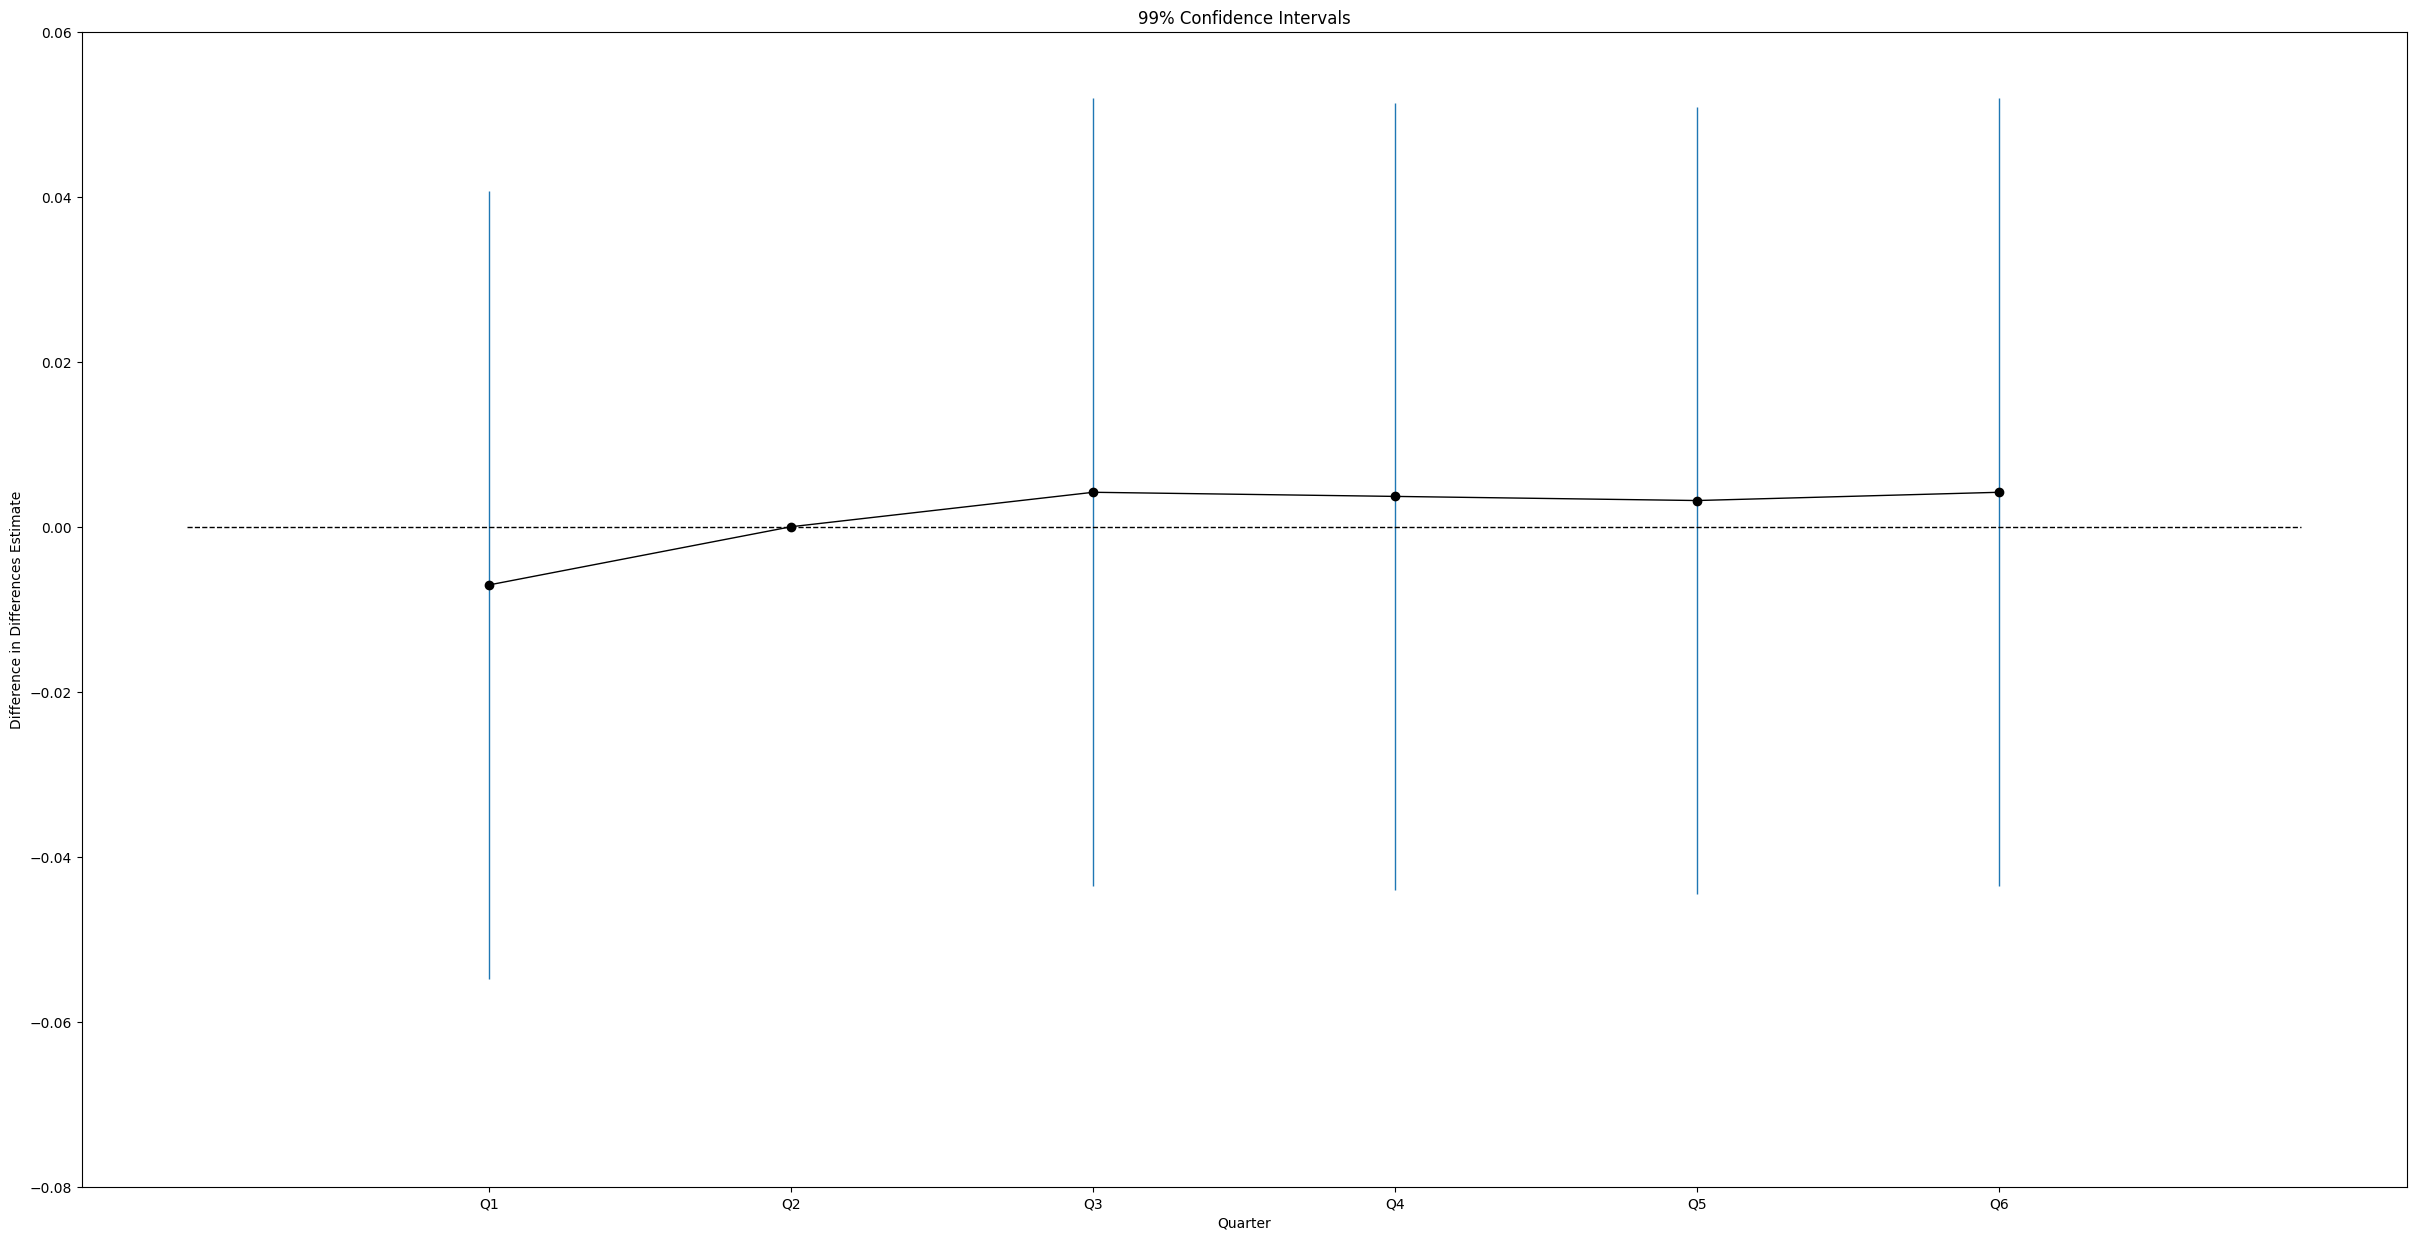

In [11]:
# plotting and formatting the confidence intervals
fig, axes = plt.subplots(1,1);

for i in conf.index:
    axes.vlines(x = i, ymin=conf.loc[i][0], ymax=conf.loc[i][1], lw = 1)

axes.plot(coeff, 'o-', lw=1, color = 'black');
axes.hlines(y=0, xmin=-1, xmax = len(conf.index), color = 'black', lw=1, linestyle = 'dashed')
axes.set_ylim(bottom = -0.08, top = 0.06);
axes.set_ylabel('Difference in Differences Estimate');
axes.set_xlabel('Quarter');
axes.set_title('99% Confidence Intervals');

# saving the chart to png file
#plt.savefig('./Assignment_4_Files/q8c.png')